#**Data Exploration**

Loading the dataset, checking null values and data types of Apple and S&P500.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats


In [3]:
from google.colab import files
files.upload()

Saving S&P 500 Historical Data.csv to S&P 500 Historical Data.csv


{'S&P 500 Historical Data.csv': b'\xef\xbb\xbf"Date","Price","Open","High","Low","Vol.","Change %"\n"07/31/2023","4,588.96","4,584.82","4,594.22","4,573.14","","0.15%"\n"07/28/2023","4,582.23","4,565.75","4,590.16","4,564.01","","0.99%"\n"07/27/2023","4,537.41","4,598.26","4,607.07","4,528.56","","-0.64%"\n"07/26/2023","4,566.75","4,558.96","4,582.47","4,547.58","","-0.02%"\n"07/25/2023","4,567.46","4,555.19","4,580.62","4,552.42","","0.28%"\n"07/24/2023","4,554.64","4,543.39","4,563.41","4,541.29","","0.40%"\n"07/21/2023","4,536.34","4,550.16","4,555.00","4,535.79","","0.03%"\n"07/20/2023","4,534.87","4,554.38","4,564.74","4,527.56","","-0.68%"\n"07/19/2023","4,565.72","4,563.87","4,578.43","4,557.48","","0.24%"\n"07/18/2023","4,554.98","4,521.78","4,562.30","4,514.59","","0.71%"\n"07/17/2023","4,522.79","4,508.86","4,532.85","4,504.90","","0.39%"\n"07/14/2023","4,505.42","4,514.61","4,527.76","4,499.56","","-0.10%"\n"07/13/2023","4,510.04","4,491.50","4,517.38","4,489.36","","0.85%"\

In [4]:
sp_df = pd.read_csv('S&P 500 Historical Data.csv')
sp_df['Date']= pd.to_datetime(sp_df['Date'])

sp_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-07-31,"4,588.96","4,584.82","4,594.22","4,573.14",NaN,0.15%
1,2023-07-28,"4,582.23","4,565.75","4,590.16","4,564.01",NaN,0.99%
2,2023-07-27,"4,537.41","4,598.26","4,607.07","4,528.56",NaN,-0.64%
3,2023-07-26,"4,566.75","4,558.96","4,582.47","4,547.58",NaN,-0.02%
4,2023-07-25,"4,567.46","4,555.19","4,580.62","4,552.42",NaN,0.28%


In [5]:
sp_df['Price'] = (sp_df['Price'].replace(',', '', regex=True).astype(float))/100
sp_df['Open'] = (sp_df['Open'].replace(',', '', regex=True).astype(float))/100
sp_df['High'] = (sp_df['High'].replace(',', '', regex=True).astype(float))/100
sp_df['Low'] = (sp_df['Low'].replace(',', '', regex=True).astype(float))/100
sp_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-07-31,45.8896,45.8482,45.9422,45.7314,NaN,0.15%
1,2023-07-28,45.8223,45.6575,45.9016,45.6401,NaN,0.99%
2,2023-07-27,45.3741,45.9826,46.0707,45.2856,NaN,-0.64%
3,2023-07-26,45.6675,45.5896,45.8247,45.4758,NaN,-0.02%
4,2023-07-25,45.6746,45.5519,45.8062,45.5242,NaN,0.28%


In [6]:
sp_df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
4064,2007-06-07,14.907,15.174,15.174,14.904,NaN,-1.76%
4065,2007-06-06,15.174,15.306,15.306,15.141,NaN,-0.89%
4066,2007-06-05,15.310,15.391,15.391,15.256,NaN,-0.53%
4067,2007-06-04,15.392,15.363,15.405,15.323,NaN,0.19%
4068,2007-06-01,15.363,15.306,15.406,15.306,NaN,0.37%


In [7]:
url = 'https://raw.githubusercontent.com/devtlv/MiniProject-DataAnalysis-W6D5-Apple_Stock_Data/main/AAPL%2C%201D%2001012007-12072023.csv'

df = pd.read_csv(url)
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [8]:
df.isnull().sum()

volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


There are no null-values which is great.
The only transformation needed is taking time from an int variable to a datetime variable.

In [10]:
df['time'] = pd.to_datetime(df['time'], unit='s')

In [11]:
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578


#**Data Visualisation**

Graphing the data to better understand the trends and patterns.

I want to see the following:
1. Is there a major movement following Apples product keynotes in September?
2. Are there any major movements that seem irregular?
3. How has the volatility of the share price been?
4. How does Apple compare to the S&P 500.


In [12]:

# Filter for September 1st dates
september_1st = df[(df['time'].dt.month == 9) & ((df['time'].dt.day == 1))]
# Create annotations for each September 1st
annotations = []
for idx, row in september_1st.iterrows():
    annotations.append(dict(
        x=row['time'],
        y=row['close'],
        xref="x",
        yref="y",
        text=f"Sep 1, {row['time'].year}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=0,
        ay=-40,  # Adjust this value to change arrow length
        bgcolor="rgba(255, 255, 255, 0.8)",  # Semi-transparent white background for text
        bordercolor="#C7C7C7",
        borderwidth=1,
        borderpad=1,
        font=dict(size=10)
    ))


In [13]:


fig = px.line(df, x='time', y=['close'], title='Apple Stock Price Over Time compared to S&P 500')
fig.add_trace(go.Scatter(
        x=sp_df['Date'],
        y=sp_df['Price'],
        mode='lines',
        name='S&P 500',
        line=dict(color='red', width=2)
    ))

# Add the annotations to the figure
fig.update_layout(annotations=annotations)
# Adjust layout for better visibility
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Closing Price",
    showlegend=True,
    hovermode="closest"
)
# Show the plot
fig.show()


Apple has seen tremendous growth over the last 20 years, evident by the strong upwards trend of the share price specifically starting around 2019.

When compared to the S&P500, the growth is even more apparent. From around September 2016, Apple grew exponentially compared to the S&P.


Some notable points in the graph:
- Apple saw a major drop around Q4 2018, leading into Q1 2019 as there was a shortfall in Iphone sales, leading to a loss of investor confidence.

- There were no significant spikes or drops in the shareprice around any of the Keynotes in September until 2020. At first glance this is surprising since this is when Apple announces their new products. I suspect that these announcements may have been expected by investors and therefore it was already priced in.
The stock dropped in 2020 because I suspect that people were expecting more from the keynote.

- There was another drop around Q1 2020 which may be attributed to the onset of COVID. The stock rebounded fairly quickly after March.

In [14]:
fig2 = px.line(df, x='time',y='volume', title='Volume traded over time')
fig2

Apples trading volume has decreased dramatically since the early 2000's. A large amount of this drop may be attributed to the meteoric rise in the share price which pushes out smaller, non-institutional investors from purchasing large amounts of Apple stock.

In [15]:
fig = go.Figure(data=[go.Candlestick(x=df['time'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.update_layout(
    title='Apple Stock Price',
    xaxis_title='Time',
    yaxis_title='Price')

fig.show()

#**Statistical Analysis**

In [16]:
high_mean, high_std, high_median = df['high'].agg(['mean', 'std', 'median'])
low_mean, low_std, low_median = df['low'].agg(['mean', 'std', 'median'])
close_mean, close_std, close_median = df['close'].agg(['mean', 'std', 'median'])

print(f'High Mean: {high_mean}')
print(f'Low Mean: {low_mean}')
print(f'Close Mean: {close_mean}')
# print(f'Volume Mean: {volume_mean}')
print()
print(f'High Median: {high_median}')
print(f'Low Median: {low_median}')
print(f'Close Median: {close_median}')
#print(f'Volume Median: {volume_median}')
print()
print(f'High Standard Deviation: {high_std}')
print(f'Low Standard Deviation: {low_std}')
print(f'Close Standard Deviation: {close_std}')
#print(f'Volume Standard Deviation: {volume_std}')

High Mean: 46.88112704977158
Low Mean: 45.865790310170716
Close Mean: 46.39605770617938

High Median: 26.2628
Low Median: 25.68
Close Median: 25.825

High Standard Deviation: 50.84387395872745
Low Standard Deviation: 49.6801037595422
Close Standard Deviation: 50.293482384840615


In [17]:
#Calculate moving average

df['50_MA'] = df['close'].rolling(window=50).mean()
df['200_MA'] = df['close'].rolling(window=200).mean()


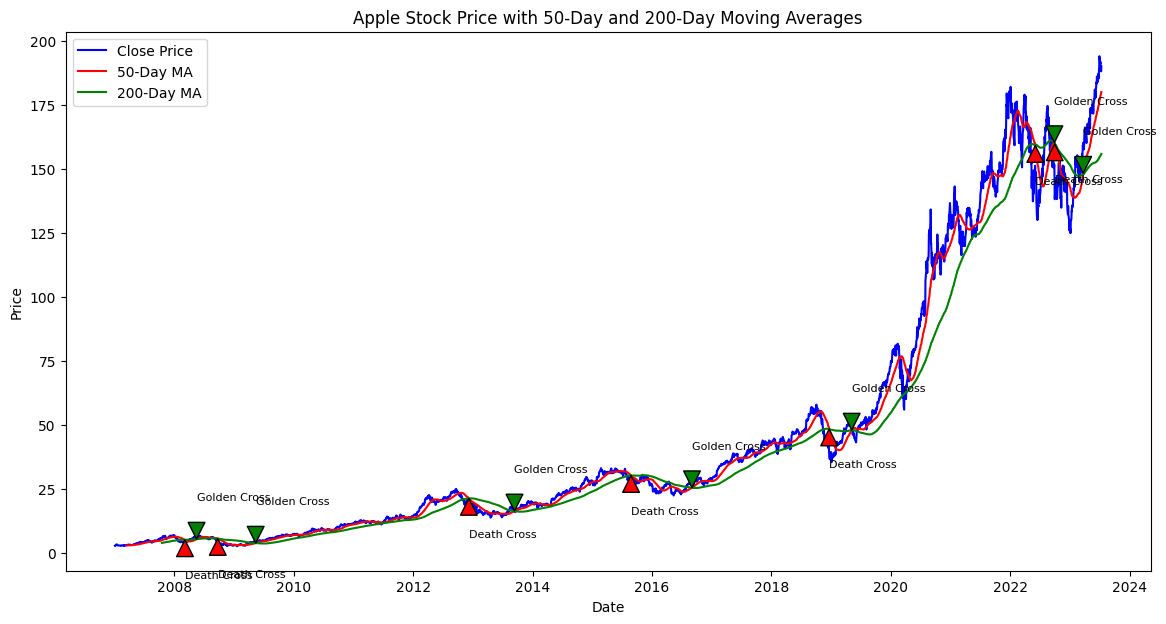

In [18]:
df['Signal'] = 0  # Default no signal
df.loc[df['50_MA'] > df['200_MA'], 'Signal'] = 1  # Golden Cross
df.loc[df['50_MA'] < df['200_MA'], 'Signal'] = -1  # Death Cross

df['Cross'] = df['Signal'].diff()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['time'],df['close'], label='Close Price', color='blue')
plt.plot(df['time'],df['50_MA'], label='50-Day MA', color='red')
plt.plot(df['time'],df['200_MA'], label='200-Day MA', color='green')

# Adding annotations for Golden Cross and Death Cross
for idx, row in df.iterrows():
    if row['Cross'] == 2:  # Golden Cross
        plt.annotate('Golden Cross', xy=(row['time'], row['50_MA']),
                     xytext=(row['time'], row['50_MA'] + 15),
                     arrowprops=dict(facecolor='green', shrink=0.8),
                     fontsize=8)
    elif row['Cross'] == -2:  # Death Cross
        plt.annotate('Death Cross', xy=(row['time'], row['50_MA']),
                     xytext=(row['time'], row['50_MA'] - 15),
                     arrowprops=dict(facecolor='red', shrink=0.8),
                     fontsize=8)
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price with 50-Day and 200-Day Moving Averages')
plt.show()



When the 50-day moving average goes above the 200-day moving average, it is known as a golden cross. This indicates that investors are bullish on the stock. Conversely, when the 50-day drops below the 200-day, it indicates that investors are bearish on the stock and is known as a death cross.

Basically, when short-term trends start to trend higher then long term trends, it signifies a possible upward movement in the stock.

#**Hypothesis testing**

In [19]:
#Null hypotheses:
#There is no difference in the avrage closing prices across all the years

grouped = df.groupby(df['time'].dt.year)['close'].mean()
#print(grouped)

prices_2009 = df[(df['time'].dt.year == 2009)]['close']
prices_2010 = df[(df['time'].dt.year == 2010)]['close']

print(prices_2009)
print(prices_2010)


504    3.2411
505    3.3779
506    3.3221
507    3.2504
508    3.3107
        ...  
751    7.4657
752    7.5575
753    7.4679
754    7.5586
755    7.5261
Name: close, Length: 252, dtype: float64
756      7.6432
757      7.6564
758      7.5346
759      7.5207
760      7.5707
         ...   
1003    11.5957
1004    11.6239
1005    11.6175
1006    11.5593
1007    11.5200
Name: close, Length: 252, dtype: float64


In [20]:
ttest, pval = stats.ttest_rel(prices_2009, prices_2010)
print(f't-statistic: {ttest}')
print(f'p-value: {pval}')

t-statistic: -115.91764204648625
p-value: 5.681188018835239e-220


The negative t-stat shows that the two samples are significantly different and the p-value indicates that it is not due to random chance. This makes sense as we saw Apple grow year/year.

In [21]:
df['daily return']  = df['close'].pct_change()
df.head()

,volume,vwap,open,close,high,low,time,transactions,50_MA,200_MA,Signal,Cross,daily return
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737,NaN,NaN,0,NaN,NaN
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333,NaN,NaN,0,0.0,0.022186
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050,NaN,NaN,0,0.0,-0.007126
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547,NaN,NaN,0,0.0,0.004938
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578,NaN,NaN,0,0.0,0.083079


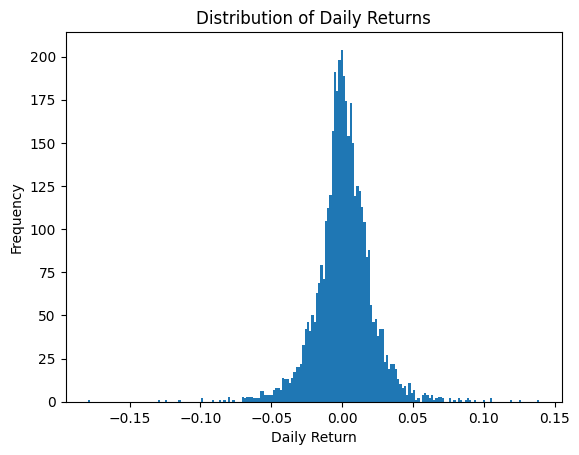

In [27]:
plt.hist(df['daily return'][1:], bins=200)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.show()

In [29]:
result = stats.normaltest(df['daily return'][1::])
print(f'Test statistic: {result.statistic}')
print(f'p-value: {result.pvalue}')

Test statistic: 535.5862106742969
p-value: 4.999563172686955e-117


I don't fully understand since the histogram looks like it is normally distributed but the t-stat and p-value say otherwise.

#**Summary and insights**

Apple has grown exponentially, especially since 2019, and indicates how bullish investors are to Apple. Even when they announce incremental upgrades to their product line, the market still responds favourably.

Apples growth is really apparent when compared to the S&P500, which has modest but consistent growth YoY. This illustrates Apples dominance in the market.



